In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

sys.path.append(r'C:\Users\acostamendoza\projects\Grid-orientation-project\src')
from GridMetrics import load_grid_metrics_from_pickle
import json
import random
import scipy
from skimage.feature import peak_local_max
from scipy.stats import linregress
%load_ext autoreload
%autoreload 2

# Set default parameters for matplotlib
plt.rcParams.update({
    'xtick.major.size': 8,
    'ytick.major.size': 8,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14, 
    'axes.titlesize': 16,
    'legend.fontsize': 12,
})

In [2]:
rat = 'r1'
mod = '2'
conjunctive_name = 'is_conj_' + rat[0].upper() + mod + '_day' + rat[1]

fig_directory  = r'C:\Users\acostamendoza\Box\grid-cell-project\review-head-direction-vs-variability'

# import the npz file called is_conjunctive_all in the folder data
is_conjunctive_all = np.load(r'C:\Users\acostamendoza\projects\Grid-orientation-project\data\is_conjunctive_all.npz')
is_conjunctive = is_conjunctive_all[conjunctive_name]

G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)
    
with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
    cell_trial_dict = json.load(f)

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


In [3]:
print(is_conjunctive)

[ True  True  True  True  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [65]:
def return_accepted_cells(cell_trial_dict):
    
    accepted = []
    
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
            elif cell_trial_dict[cell][trial]['spacing_even'] is None:
                none_trials += 1
                
        if none_trials <= 5:
            accepted.append(cell)
    
    return accepted


def get_delta_mean_differences(cell_trial_dict):
    
    accepted = return_accepted_cells(cell_trial_dict)
    
    delta_orientation_within_mean = []
    delta_orientation_between_mean = []
    delta_spacing_within_mean = []
    delta_spacing_between_mean = []
    
    for cell in accepted:
        
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['spacing_odd'] is not None) and (cell_trial_dict[cell][trial]['spacing_even'] is not None):
            
                delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['spacing_odd'] is None) or (cell_trial_dict[second_cell][trial]['spacing_even'] is None):
                    second_cell = random.choice(list(accepted))
                delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
                delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
                delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_within_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_between_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_within_mean.append(np.mean(delta_spacing_single_cell))
        delta_spacing_between_mean.append(np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_within_mean = np.array(delta_orientation_within_mean)
    delta_orientation_between_mean = np.array(delta_orientation_between_mean)
    delta_spacing_within_mean = np.array(delta_spacing_within_mean)
    delta_spacing_between_mean = np.array(delta_spacing_between_mean)
    
    return delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean

In [66]:
accepted = return_accepted_cells(cell_trial_dict)
accepted = [int(cell) for cell in accepted]
print(len(accepted))

conjunctive_idx = np.where(is_conjunctive == 1)[0]
print(len(conjunctive_idx))

# return indices of accepted cells that are conjunctive
conjunctive_accepted = np.intersect1d(accepted, conjunctive_idx)
print(len(conjunctive_accepted))

conjunctive_idx = np.where(is_conjunctive == 0)[0]
conjunctive_accepted = np.intersect1d(accepted, conjunctive_idx)
print(len(conjunctive_accepted))

82
19
11
71


In [67]:
accepted = return_accepted_cells(cell_trial_dict)
accepted = [int(cell) for cell in accepted]

print(accepted)

conjunctive_idx = np.where(is_conjunctive == 1)[0]
conjunctive_accepted = np.intersect1d(accepted, conjunctive_idx)

print(conjunctive_accepted)

# make a true and false vector of the size of the accepted such that if the cell is conjunctive it is true
# and if it is not conjunctive it is false
conjunctive = []
for cell in accepted:
    if cell in conjunctive_accepted:
        conjunctive.append(True)
    else:
        conjunctive.append(False)

print(conjunctive)

orientation_within_mean, orientation_between_mean, spacing_within_mean, spacing_between_mean = get_delta_mean_differences(cell_trial_dict)

orientation_within_conjunctive = orientation_within_mean[conjunctive]
orientation_between_conjunctive = orientation_between_mean[conjunctive]
spacing_within_conjunctive = spacing_within_mean[conjunctive]
spacing_between_conjunctive = spacing_between_mean[conjunctive]

[4, 5, 7, 8, 10, 14, 15, 16, 17, 18, 20, 25, 31, 34, 36, 38, 40, 42, 44, 46, 47, 48, 49, 50, 53, 56, 57, 58, 59, 60, 65, 75, 77, 78, 82, 83, 89, 92, 94, 95, 97, 98, 99, 100, 102, 104, 105, 106, 109, 110, 111, 112, 114, 116, 117, 120, 124, 125, 126, 128, 129, 130, 131, 138, 139, 142, 143, 146, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 164, 165, 166, 167]
[ 4  5  7  8 10 14 15 16 17 18 20]
[True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [68]:
def plot_review_figure_scatter(rat, mod):

    if len(rat) > 1:
        conjunctive_name = 'is_conj_' + rat[0].upper() + mod + '_day' + rat[1]
    else:
        conjunctive_name = 'is_conj_' + rat[0].upper() + mod
    
    # import the npz file called is_conjunctive_all in the folder data
    is_conjunctive_all = np.load(r'C:\Users\acostamendoza\projects\Grid-orientation-project\data\is_conjunctive_all.npz')
    is_conjunctive = is_conjunctive_all[conjunctive_name]
    
    G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)
        
    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
        cell_trial_dict = json.load(f)
    
    (orientation_within, orientation_between, spacing_within, spacing_between) = get_delta_mean_differences(cell_trial_dict)
    
    accepted = return_accepted_cells(cell_trial_dict)
    accepted = [int(cell) for cell in accepted]
    conjunctive_idx = np.where(is_conjunctive == 1)[0]
    conjunctive_accepted = np.intersect1d(accepted, conjunctive_idx)
    
    # make a true and false vector of the size of the accepted such that if the cell is conjunctive it is true
    # and if it is not conjunctive it is false
    conjunctive = []
    for cell in accepted:
        if cell in conjunctive_accepted:
            conjunctive.append(True)
        else:
            conjunctive.append(False)
            
    orientation_within_conjunctive = orientation_within[conjunctive]
    orientation_between_conjunctive = orientation_between[conjunctive]
    spacing_within_conjunctive = spacing_within[conjunctive]
    spacing_between_conjunctive = spacing_between[conjunctive]
    
    orientation_within_non_conjunctive = orientation_within[np.logical_not(conjunctive)]
    orientation_between_non_conjunctive = orientation_between[np.logical_not(conjunctive)]
    spacing_within_non_conjunctive = spacing_within[np.logical_not(conjunctive)]
    spacing_between_non_conjunctive = spacing_between[np.logical_not(conjunctive)]
    
    # Scatter plot of within vs between variability but conjunctive vs non-conjunctive, in different colors 
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    
    ax = axes[0]
    ax.scatter(orientation_within_conjunctive, orientation_between_conjunctive, color = 'lightcoral', s= 30, edgecolor='grey', label = 'Conjunctive (' + str(len(orientation_within_conjunctive)) + ')')
    ax.scatter(orientation_within_non_conjunctive, orientation_between_non_conjunctive, color = 'lightblue', s= 30, edgecolor='grey', label = 'Non-Conjunctive (' + str(len(orientation_within_non_conjunctive)) + ')')
    ax.set_title('Orientation Variability ' + rat + mod, fontsize=16)
    
    ax.set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
    ax.set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.plot([0, 5], [0, 5], color='black')
    
    ax = axes[1]
    ax.scatter(spacing_within_conjunctive, spacing_between_conjunctive, color = 'lightcoral', s= 30, edgecolor='grey', label = 'Conjunctive (' + str(len(spacing_within_conjunctive)) + ')')
    ax.scatter(spacing_within_non_conjunctive, spacing_between_non_conjunctive, color = 'lightblue', s= 30, edgecolor='grey', label = 'Non-Conjunctive (' + str(len(spacing_within_non_conjunctive)) + ')')
    ax.set_title('Spacing Variability ', fontsize=16)
    
    ax.set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
    ax.set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 15)
    ax.plot([0, 15], [0, 15], color='black')
    
    # add suptitle
    fig.suptitle(rat + mod, fontsize=18)
    
    
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.label.set_size(14)
        ax.yaxis.label.set_size(14)
        
        # add legend and along tags of legend how many cells there are
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    plt.tight_layout()
    plt.savefig(fig_directory + '/rat-' + rat + '-mod-' + mod + '_scatter.png')
    # save as svg too
    plt.savefig(fig_directory + '/rat-' + rat + '-mod-' + mod + '_scatter.svg')
    plt.show()

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


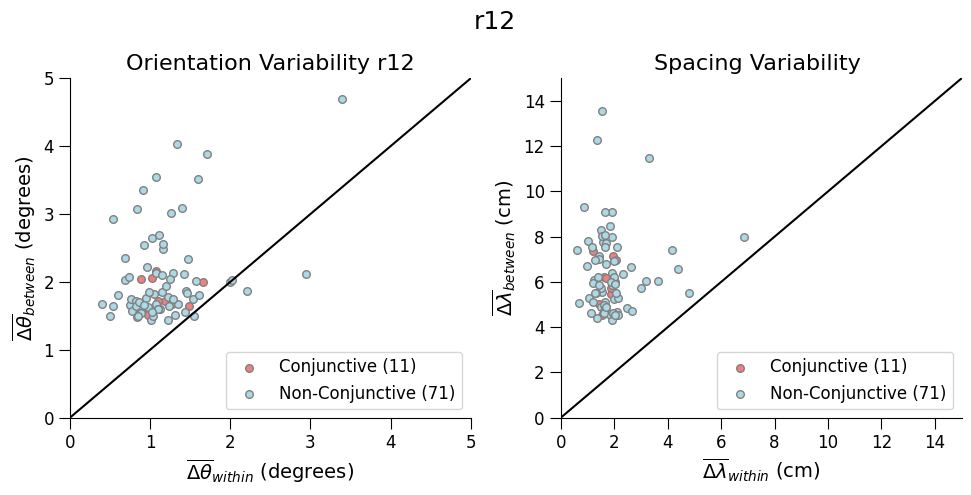

In [69]:
plot_review_figure_scatter('r1', '2')

In [64]:
def get_delta_mean_differences_conjunctive(cell_trial_dict, is_conjunctive, conjunctive_excluded = False):
    
    delta_orientation_within_mean = []
    delta_orientation_between_mean = []
    delta_spacing_within_mean = []
    delta_spacing_between_mean = []
    
    accepted = return_accepted_cells(cell_trial_dict)
    accepted = [int(cell) for cell in accepted]
    non_conjunctive_idx = np.where(is_conjunctive == 0)[0]
    accepted_non_conjunctive = np.intersect1d(accepted, non_conjunctive_idx)
    accepted_non_conjunctive = [str(cell) for cell in accepted_non_conjunctive]
    
    if conjunctive_excluded:
        accepted = accepted_non_conjunctive
    else:
        accted = [str(cell) for cell in accepted]
        
    for cell in accepted_non_conjunctive:
        
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['spacing_odd'] is not None) and (cell_trial_dict[cell][trial]['spacing_even'] is not None):
            
                delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['spacing_odd'] is None) or (cell_trial_dict[second_cell][trial]['spacing_even'] is None):
                    second_cell = random.choice(list(accepted))
                delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
                delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
                delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_within_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_between_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_within_mean.append(np.mean(delta_spacing_single_cell))
        delta_spacing_between_mean.append(np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_within_mean = np.array(delta_orientation_within_mean)
    delta_orientation_between_mean = np.array(delta_orientation_between_mean)
    delta_spacing_within_mean = np.array(delta_spacing_within_mean)
    delta_spacing_between_mean = np.array(delta_spacing_between_mean)
    
    return delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean

In [75]:
# do a boxplot of delta_orientation_between_mean of conjunctive and non-conjunctive cells
from scipy.stats import ttest_ind

def plot_review_figure(rat, mod):

    if len(rat) > 1:
        conjunctive_name = 'is_conj_' + rat[0].upper() + mod + '_day' + rat[1]
    else:
        conjunctive_name = 'is_conj_' + rat[0].upper() + mod
    
    # import the npz file called is_conjunctive_all in the folder data
    is_conjunctive_all = np.load(r'C:\Users\acostamendoza\projects\Grid-orientation-project\data\is_conjunctive_all.npz')
    is_conjunctive = is_conjunctive_all[conjunctive_name]
    
    G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)
        
    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
        cell_trial_dict = json.load(f)
    
    orientation_within_excluded, orientation_between_excluded, spacing_within_excluded, spacing_between_excluded = get_delta_mean_differences_conjunctive(cell_trial_dict, is_conjunctive, conjunctive_excluded = True)
    orientation_within_included, orientation_between_included, spacing_within_included, spacing_between_included = get_delta_mean_differences_conjunctive(cell_trial_dict, is_conjunctive, conjunctive_excluded = False)
    
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    
    ax = axes[0]
    ax.boxplot([orientation_between_included, orientation_between_excluded], showfliers=False)
    # add scatter points with jitter to their respective columns
    # for value in orientation_between_included:
    #         jittered_x = 1 + np.random.normal(0, 0.02)  # Add jitter to the x-coordinate
    #         ax.scatter(jittered_x, value, color='lightblue', edgecolor='black')
    # for value in orientation_between_excluded:
    #     jittered_x = 2 + np.random.normal(0, 0.02)  # Add jitter to the x-coordinate
    #     ax.scatter(jittered_x, value, color='lightcoral', edgecolor='black')
                    
    ax.set_xticklabels(['Included', 'Non-included'])
    ax.set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)', fontsize=16)
    ax.set_title('Orientation', fontsize=16)
    
    # do t-test to see if the two distributions are different
    t_stat, p_value = ttest_ind(orientation_between_included, orientation_between_excluded)
    ax.text(0.5, 0.9, 'p-value = {:.2f}'.format(p_value), transform=ax.transAxes, fontsize=14)
    
    ax = axes[1]
    ax.boxplot([spacing_between_included, spacing_between_excluded], showfliers=False)
    # add scatter points with jitter to their respective columns
    # for value in spacing_between_included:
    #     jittered_x = 1 + np.random.normal(0, 0.02)  # Add jitter to the x-coordinate
    #     ax.scatter(jittered_x, value, color='lightblue', edgecolor='black')
    # for value in spacing_between_excluded:
    #     jittered_x = 2 + np.random.normal(0, 0.02)  # Add jitter to the x-coordinate
    #     ax.scatter(jittered_x, value, color='lightcoral', edgecolor='black')
    
    ax.set_xticklabels(['Included', 'Excluded'])
    ax.set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)', fontsize=16)
    ax.set_title('Spacing', fontsize=16)
    
    # do t-test to see if the two distributions are different
    t_stat, p_value = ttest_ind(spacing_between_included, spacing_between_excluded)
    ax.text(0.5, 0.9, 'p-value = {:.2f}'.format(p_value), transform=ax.transAxes, fontsize=14)
    
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
    # add sutptitle
    fig.suptitle(rat + mod, fontsize=18)
    
    # add the p-value to the plot
    plt.tight_layout()
    plt.savefig(fig_directory + '/rat-' + rat + '-mod-' + mod + '_boxplot.png')
    # save as svg too
    plt.savefig(fig_directory + '/rat-' + rat + '-mod-' + mod + '_boxplot.svg')
    plt.show()

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q1 already exists


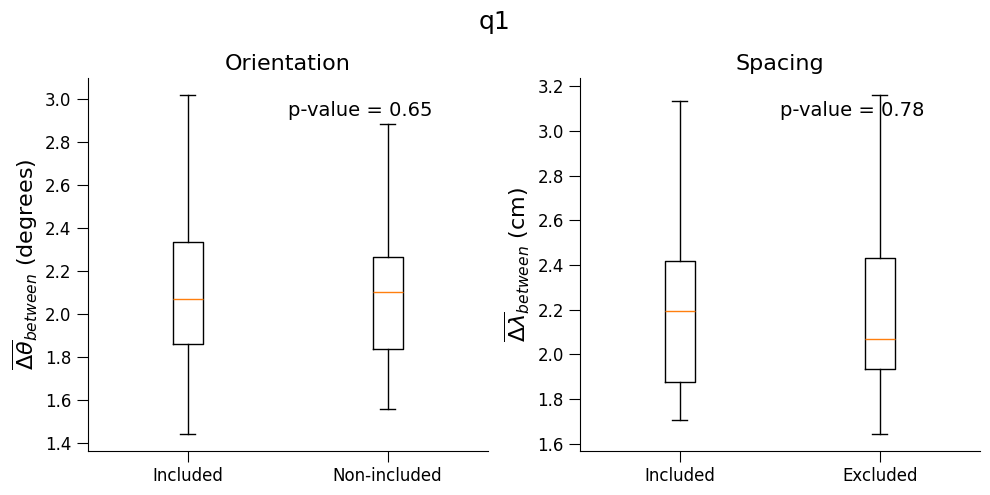

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q1 already exists


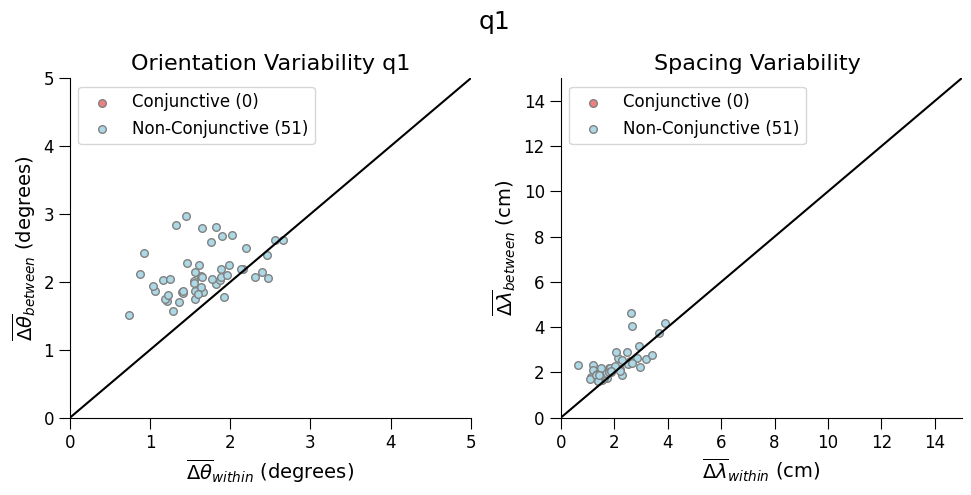

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q2 already exists


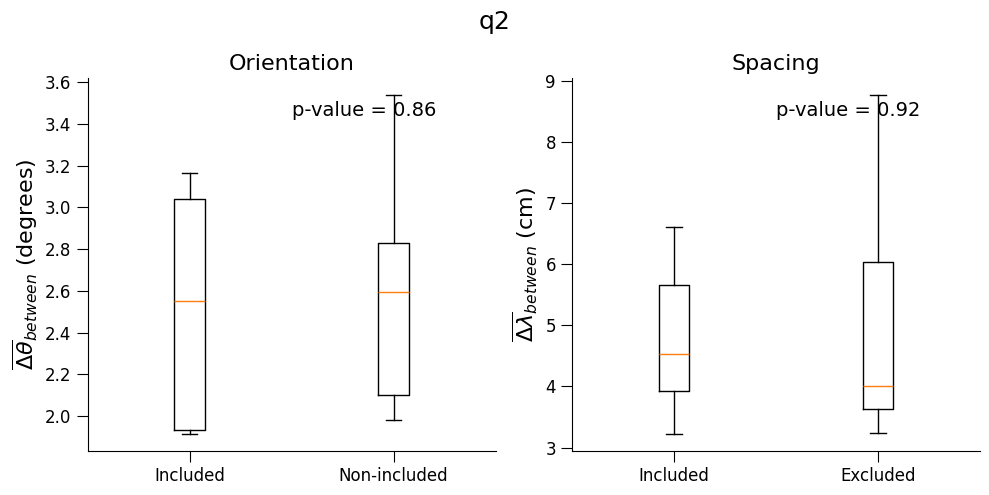

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q2 already exists


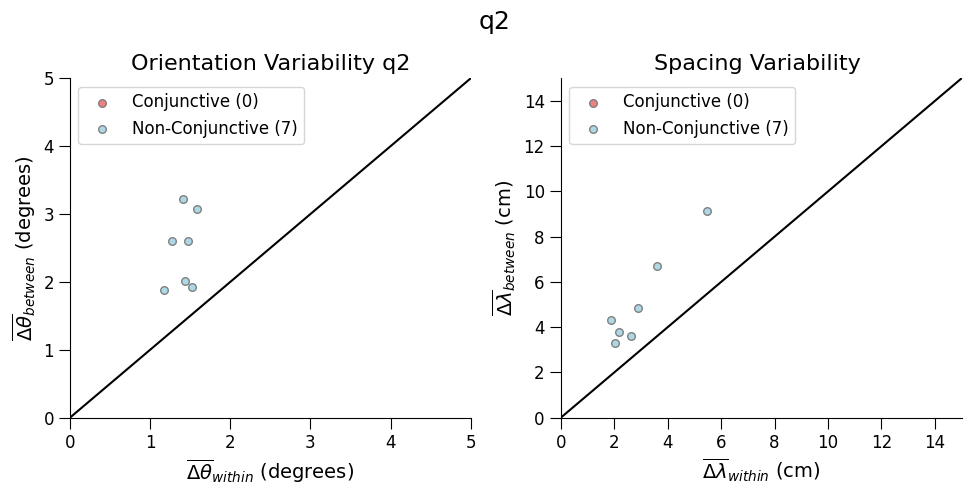

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r11 already exists


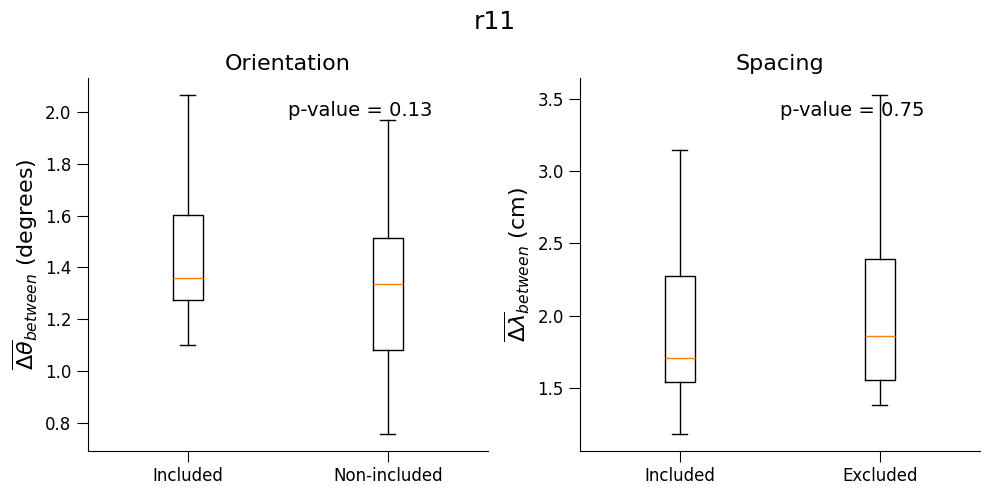

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r11 already exists


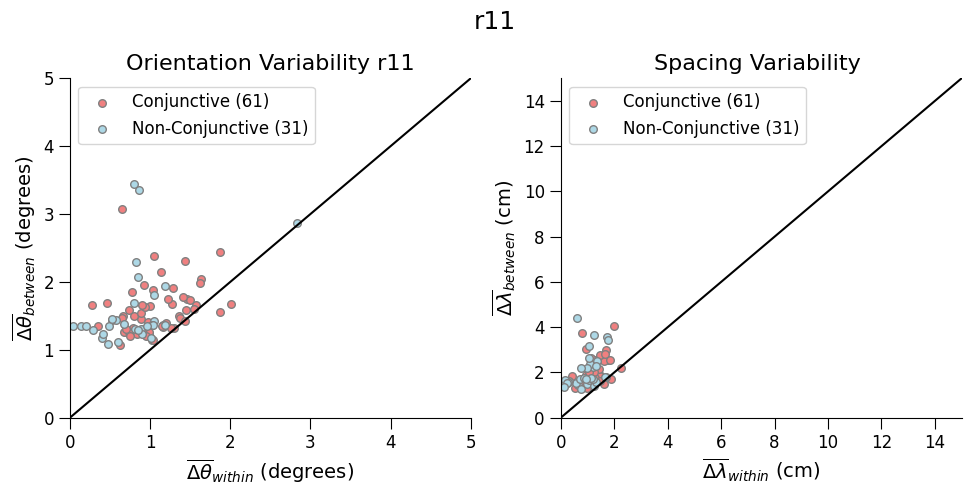

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


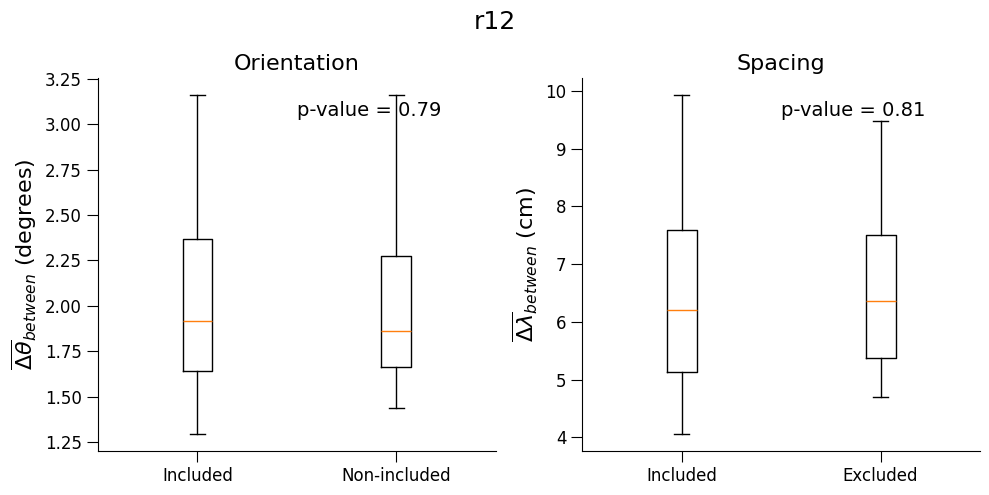

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


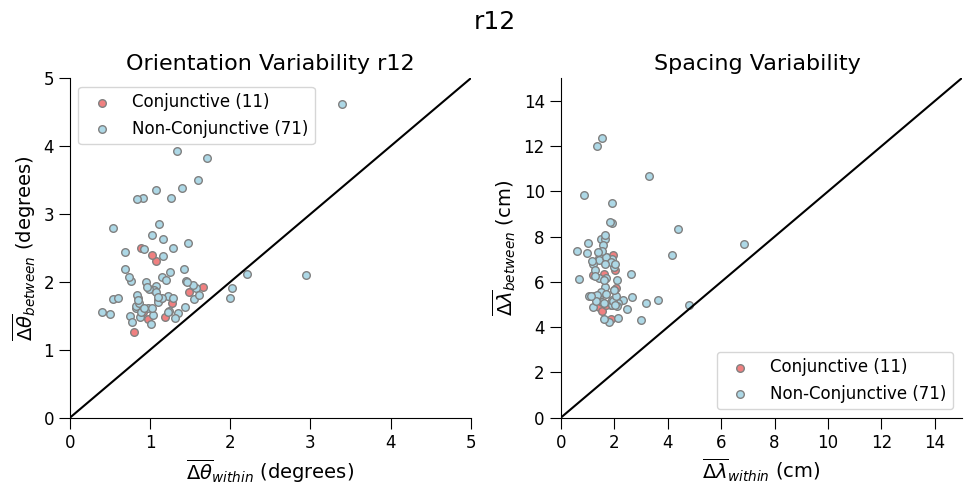

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r13 already exists


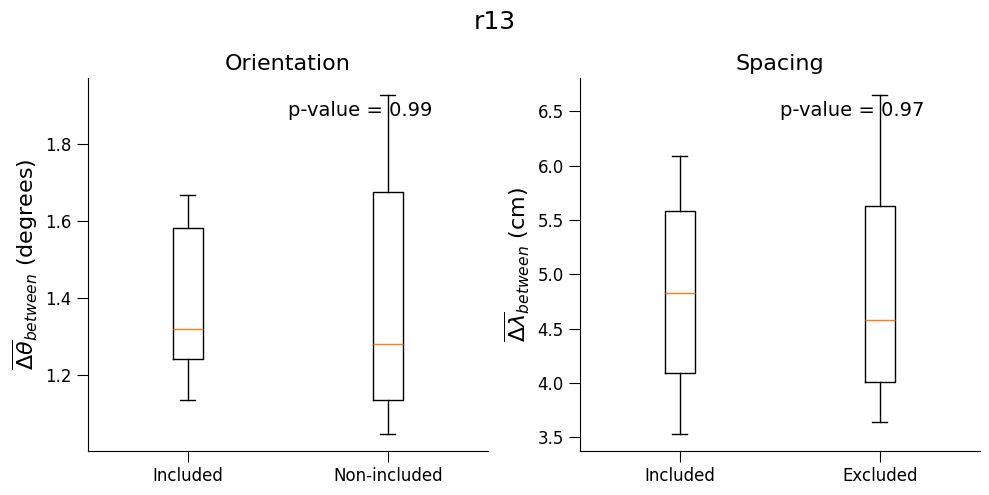

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r13 already exists


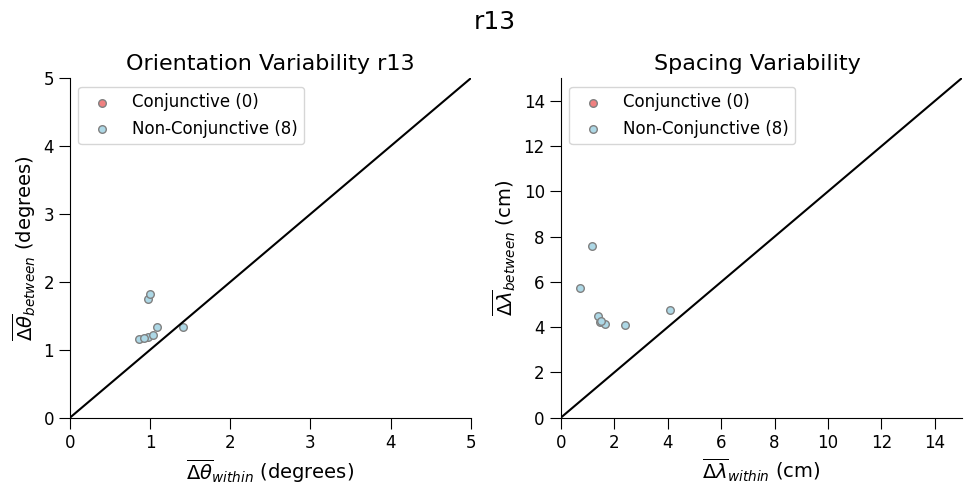

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\s1 already exists


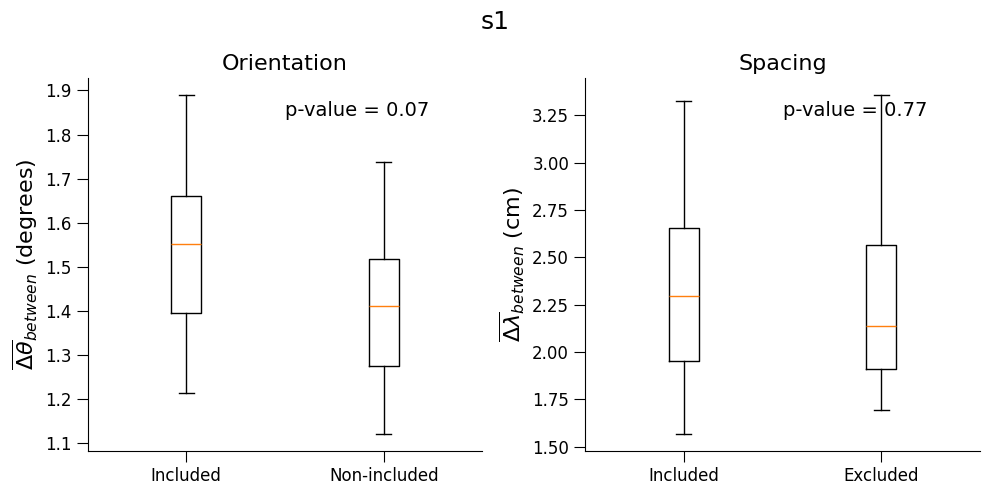

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\s1 already exists


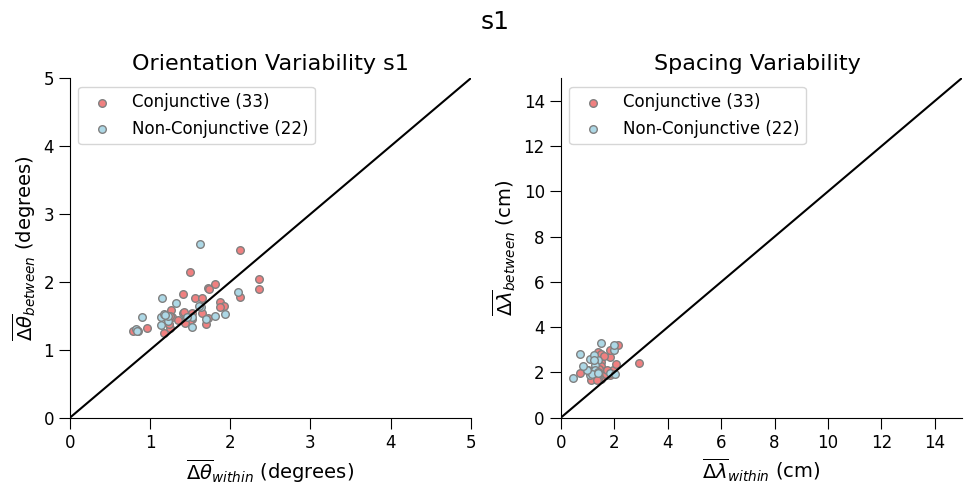

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r21 already exists


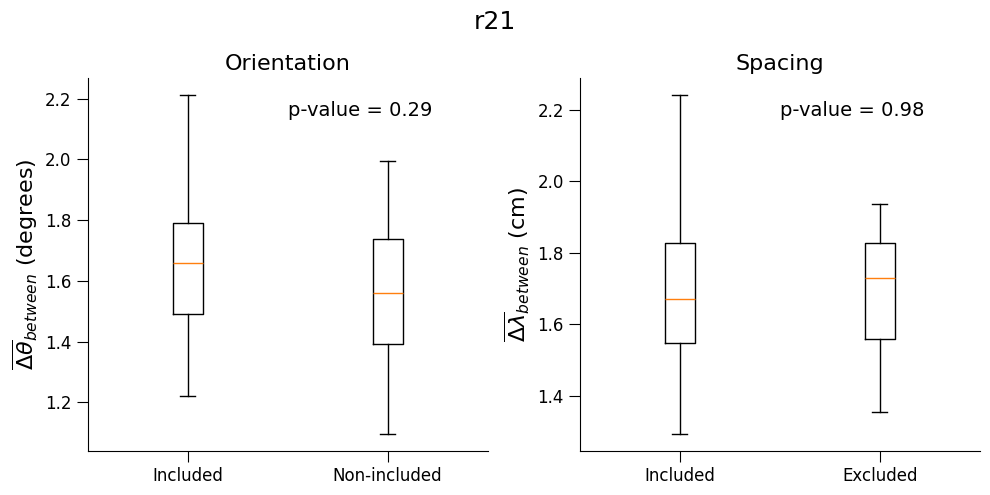

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r21 already exists


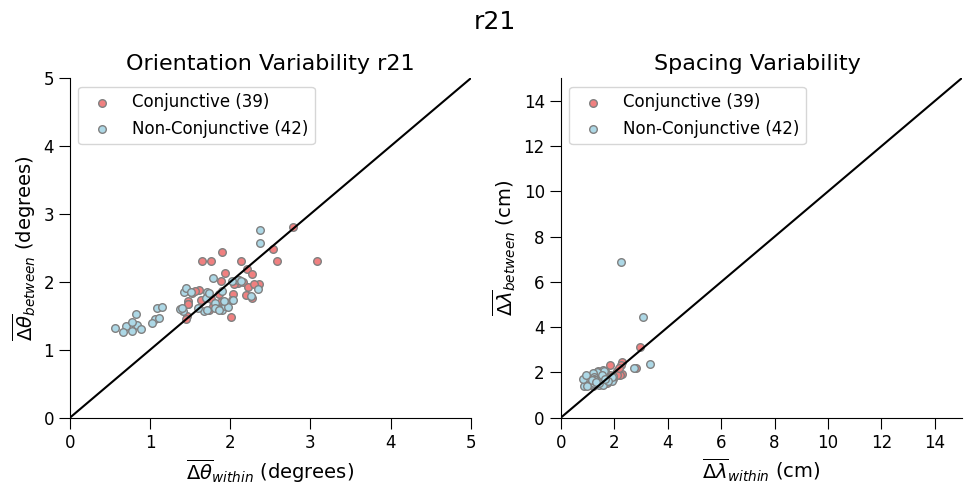

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r22 already exists


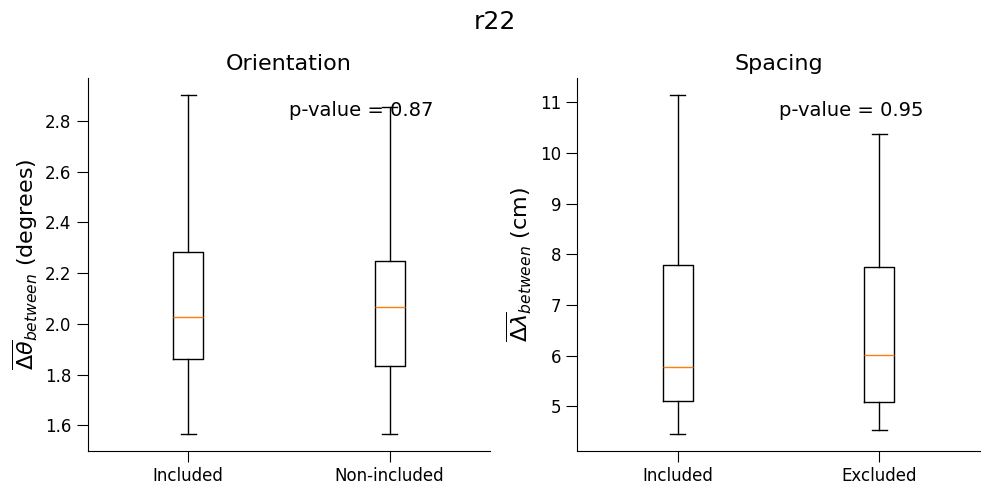

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r22 already exists


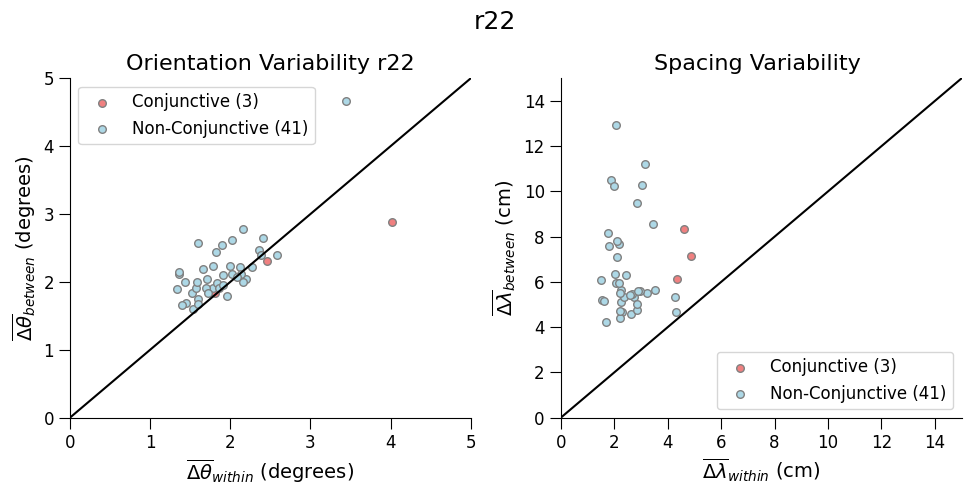

In [76]:
rats = ['q', 'q', 'r1', 'r1', 'r1', 's', 'r2', 'r2']
mods = ['1', '2', '1', '2', '3', '1', '1', '2']

for rat, mod in zip(rats, mods):
    plot_review_figure(rat, mod)
    plot_review_figure_scatter(rat, mod)

In [65]:
is_conjunctive_all = np.load(r'C:\Users\acostamendoza\projects\Grid-orientation-project\data\is_conjunctive_all.npz')
print(is_conjunctive_all.files)

['is_conj_R1_day1', 'is_conj_R2_day1', 'is_conj_R3_day1', 'is_conj_R1_day2', 'is_conj_R2_day2', 'is_conj_R3_day2', 'is_conj_Q1', 'is_conj_Q2', 'is_conj_S1']
